## 1.0 Introduction

Data Visualization is an important and exciting aspect of data science. It reveals information we otherwise wouldn't have noticed. It allows us to showcase the work we've done through visualizations, which can be stagnant or interactive. 

### 1.1 Python Modules

[matplotlib](http://matplotlib.org/) is a 2D python plotting library which allows you to generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code.

[bokeh](http://bokeh.pydata.org/en/latest/) is an interactive visualization library for modern web browsers presentation. 

[seaborn](http://seaborn.pydata.org/introduction.html#introduction) is a library for making statistical graphics in Python. It's built on top of matplotlib and is tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels. 

[ggplot](http://ggplot.yhathq.com/) is a plotting system built for making profressional-looking plots quickly with minimal code.

## 2.0 Matplotlib

`matplotlib.pyplot` is a collection of functions that make matplotlib work similar to matlab. Each pyplot function makes some change to a figure. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes. 


### 2.3 Basic Plots

In this section, we'll overview the basic plot types: line plots, scatter plots, and histograms.

#### 2.3.1 Line Plots 

Line graphs are plots where a line is drawn to indicate a relationship between a particular set of x and y values.


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

To be able to plot anything, we need to provide the data points, so we declare those as follows:

In [14]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

Using `matplotlib`, we can plot a line between plot x and y.

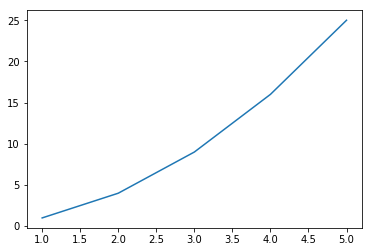

In [15]:
plt.plot(x, y)

#### 2.3.2 Scatter Plots

Alternatively, you might want to plot quantities with 2 positions as data points. To do this, you first have to import the needed libraries, as always. We'll be using the same data from before:

In [16]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

Next, we plot it with the `plt.plot()` method. Note that the `o` denotes the type of graph we're plotting. 

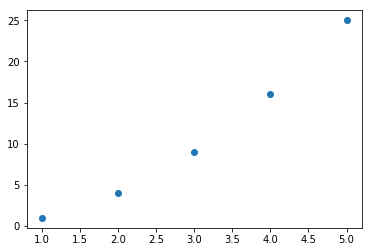

In [17]:
plt.plot(x, y, 'o')

#### 2.3.3 Histograms

Histograms are very often used in science applications and it's highly likely that you will need to plot them at some point. They are very useful to plot distributions. As before, we'll use `numpy` and `matplotlib`.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

First, we'll make the data to plot. We're going to make a normal distribution with 1000 points. 

In [19]:
data = np.random.normal(5.0, 3.0, 1000)

Now, we actually make that histogram of the data array and attach a label:

(array([   3.,   10.,   61.,  150.,  210.,  249.,  176.,   96.,   37.,    8.]),
 array([ -5.20509097,  -3.28254692,  -1.36000288,   0.56254117,
          2.48508522,   4.40762926,   6.33017331,   8.25271736,
         10.1752614 ,  12.09780545,  14.0203495 ]),
 <a list of 10 Patch objects>)

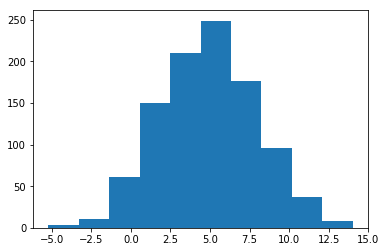

In [20]:
plt.hist(data)

## 3.0 Customization

The default customization for matplotlib isn't very appealing or even helpful in data visualization tasks. 

### 3.1 Colors

When there are multiple data points or objects, they have to be able to be differentiated between one another. An easy way to do that is by using different marker styles and colors. You can do this by editing the third parameter to include a letter that indicates the color, such as: 

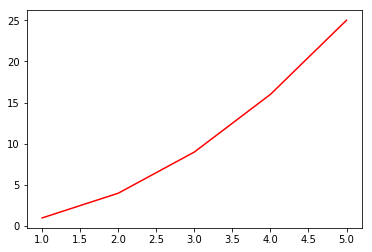

In [21]:
plt.plot(x, y, "r")

This will give you the same line as before, but now it'll be red. 

### 3.2 Styles

You can also customize the style of the your lines and markers. With line graphs, you can change the line to be dotted, dashed, etc, for example the following should give you a dashed line now:

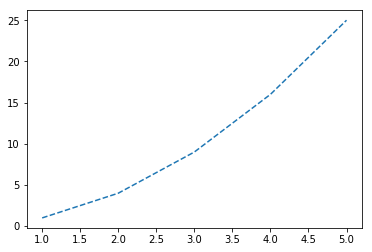

In [22]:
plt.plot(x,y, "--")

You can find other linestyles you can use can be found on the [Matplotlib webpage](http://
matplotlib.sourceforge.net/api/pyplot)

With Scatter Plots, you can customize the dots to be squares, pentagons, etc. This will get you the a scatter plot with star markers:

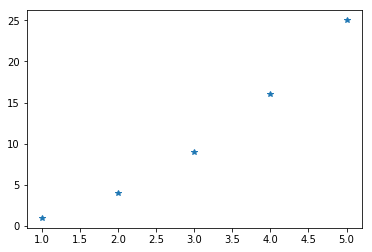

In [23]:
plt.plot(x,y, "*")

### 3.3 Labels

We want to always label the axes of plots to tell users what they're looking at. You can do this in matplotlib, very easily:

If we want to attach a label on the x-axis, we can do that with the `xlabel()` function: 

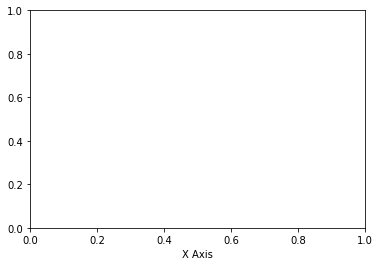

In [24]:
plt.xlabel("X Axis")

With a quick modification, we can also do that for the y-axis:

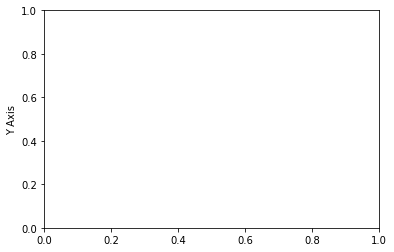

In [25]:
plt.ylabel("Y Axis")

What good is a visualization without a title to let us know what the visualization is showing? Luckily, matplotlib has a built in function for that:

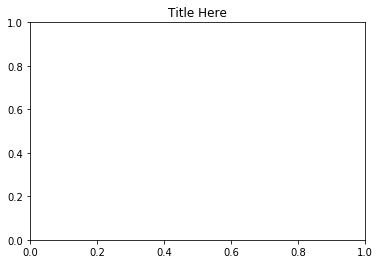

In [26]:
plt.title("Title Here")

Lastly, we can even customize the range for the x and y axes: 

(0, 10)

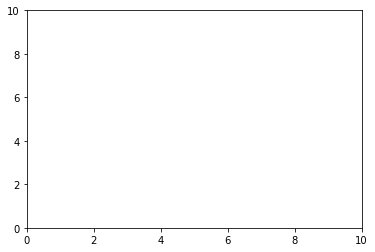

In [27]:
plt.xlim(0, 10)
plt.ylim(0, 10)

## 4.0 Seaborn

[seaborn](http://seaborn.pydata.org/introduction.html#introduction) is a library for making statistical graphics in Python. It's built on top of matplotlib and is tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels. 

In [28]:
from urllib.request import urlretrieve
import pandas as pd

In [29]:
url = "https://gist.githubusercontent.com/jhamrick/cfa18fcd3032ba435ec78a194b1447be/raw/4a4052c56161df8e454a61ab5286a769799c64b8/task_data.csv"
urlretrieve(url, "task_data.csv")

('task_data.csv', <http.client.HTTPMessage at 0x1064e36d8>)

In [30]:
task_data = pd.read_csv("task_data.csv")
task_data.head()

,pid,robot,inference,human_tasks,robot_tasks,both_tasks,total_tasks
0,00d648c5,fixed,oracle,15,15,9,39
1,00d648c5,predictive,oracle,23,15,1,39
2,00d648c5,reactive,oracle,18,17,4,39
3,01276036,fixed,oracle,25,11,3,39
4,01276036,predictive,oracle,25,14,0,39


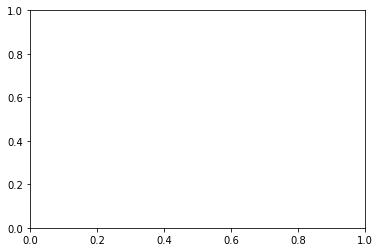

In [31]:
fig, ax = plt.subplots()

Plot the bars:

In [32]:
tasks = task_data.groupby(['robot', 'inference'])['robot_tasks'].mean()
ax.bar(np.arange(len(tasks)), tasks, align='center')

<Container object of 6 artists>

Show the 50% mark, which would indicate an equal number of tasks being completed by the robot and the human. There are 39 tasks total, so 50% is 19.5

In [33]:
ax.hlines(19.5, -0.5, 5.5, linestyle='--', linewidth=1)

Set a reasonable y-axis limit

In [34]:
ax.set_ylim(0, 40)

(0, 40)

Apply labels to the bars so you know which is which

In [35]:
ax.set_xticks(np.arange(len(tasks)))
ax.set_xticklabels(["\n".join(x) for x in tasks.index])

Now, let's import seaborn and see what happens. 

In [36]:
import seaborn as sns

Now, if we re-run the code, we'll see the different default graph for seaborn:

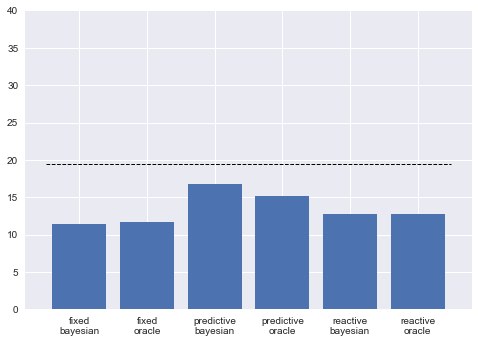

In [37]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(tasks)), tasks, align='center')
ax.hlines(19.5, -0.5, 5.5, linestyle='--', linewidth=1)

ax.set_ylim(0, 40)
ax.set_xticks(np.arange(len(tasks)))
ax.set_xticklabels(["\n".join(x) for x in tasks.index])

The barplot function gives us a legend telling us which color corresponds to which inference type. But, for this plot, I'd actually like to put the inference types under the bars as ticklabels, and then label each group of bars with the robot type. I can accomplish this by splitting the plot into three subplots, which is quite easy to do using Seaborn's FacetGrid:

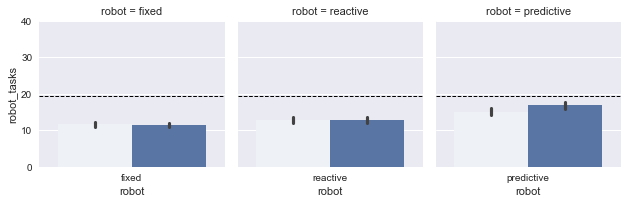

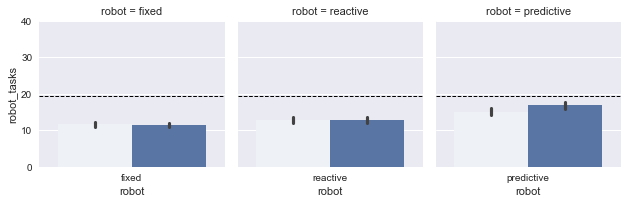

In [38]:
g = sns.FacetGrid(
	task_data,
	col="robot",
	col_order=["fixed", "reactive", "predictive"],
	sharex=False)

    # Create the bar plot on each subplot
g.map(
	sns.barplot,
	"robot", "robot_tasks", "inference",
	hue_order=["oracle", "bayesian"])

    # Now I need to draw the 50% lines on each subplot
    # separately
axes = np.array(g.axes.flat)
for ax in axes:
	ax.hlines(19.5, -0.5, 0.5, linestyle='--', linewidth=1)
	ax.set_ylim(0, 40)

plt.gcf()

## 5.0 ggplot

Ggplot is yet another module we can use for data visualizations in Python. 

In [40]:
from ggplot import *

ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

ModuleNotFoundError: No module named 'ggplot'